<a href="https://colab.research.google.com/github/RaoMasood1/Listen_to_Your_Heart_A_Disease_Prediction/blob/main/%F0%9F%92%95%F0%9F%92%94Listen_to_Your_Heart_A_Disease_Prediction%F0%9F%94%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
!pip install category_encoders
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107729 sha256=21879b0a5ddff1de9df262789fddbd504fa3d7b159d51d151386fcbfc9ee823e
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [7]:
import category_encoders as ce
import eli5
from eli5.sklearn import PermutationImportance

In [3]:
df=pd.read_csv('/content/💕💔Listen to Your Heart A Disease Prediction🔮.csv')

In [4]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1].values

In [5]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.head(10).style.background_gradient(cmap="Reds")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.400000,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.300000,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.000000,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.500000,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.600000,2,0,2,1


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x ,y , test_size=0.2,random_state=0)

In [17]:
print(x_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
74    43    0   2       122   213    0        1      165      0      0.2   
153   66    0   2       146   278    0        0      152      0      0.0   
64    58    1   2       140   211    1        0      165      0      0.0   
296   63    0   0       124   197    0        1      136      1      0.0   
287   57    1   1       154   232    0        0      164      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
251   43    1   0       132   247    1        0      143      1      0.1   
192   54    1   0       120   188    0        1      113      0      1.4   
117   56    1   3       120   193    0        0      162      0      1.9   
47    47    1   2       138   257    0        0      156      0      0.0   
172   58    1   1       120   284    0        0      160      0      1.8   

     slope  ca  thal  
74       1   0     2  
153      1   1     2  
64       2   0    

In [18]:
print(y_train)

[1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1
 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1
 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0
 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0]


In [19]:
print(x_test)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
225   70    1   0       145   174    0        1      125      1      2.6   
152   64    1   3       170   227    0        0      155      0      0.6   
228   59    1   3       170   288    0        0      159      0      0.2   
201   60    1   0       125   258    0        0      141      1      2.8   
52    62    1   2       130   231    0        1      146      0      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
146   44    0   2       118   242    0        1      149      0      0.3   
302   57    0   1       130   236    0        0      174      0      0.0   
26    59    1   2       150   212    1        1      157      0      1.6   
108   50    0   1       120   244    0        1      162      0      1.1   
89    58    0   0       100   248    0        0      122      0      1.0   

     slope  ca  thal  
225      0   0     3  
152      1   0     3  
228      1   0    

In [20]:
print(y_test)

[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1]


In [21]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model_logistic= LogisticRegression()
model_logistic.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
#SVM

from sklearn.svm import SVC
model_svm=SVC()

model_svm.fit(x_train,y_train)

SVC()

In [23]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()
model_knn.fit(x_train, y_train)

KNeighborsClassifier()

In [24]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
model_tree= DecisionTreeClassifier()
model_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_random= RandomForestClassifier()
model_random.fit(x_train, y_train)

RandomForestClassifier()

In [26]:
#XGBoost
from xgboost import XGBClassifier
model_xg=XGBClassifier()
model_xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [28]:
#Neural Networks
from sklearn.neural_network import MLPClassifier
features = df.drop("target", axis=1)
target = df["target"]
clf = MLPClassifier(hidden_layer_sizes=(100, 100), activation="relu", solver="adam", max_iter=1000)
clf.fit(features, target)
predictions = clf.predict(features)
accuracy = np.mean(predictions == target)

In [29]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [30]:
#LightGBM
import lightgbm as lgb
model_gbm = lgb.LGBMClassifier()
model_gbm.fit(x_train,y_train)

LGBMClassifier()

In [31]:
y_pred_logis= model_logistic.predict(x_test)
y_pred_svm=model_svm.predict(x_test)
y_pred_knn=model_knn.predict(x_test)
y_pred_tree=model_tree.predict(x_test)
y_pred_rf=model_random.predict(x_test)
y_pred_xg=model_xg.predict(x_test)
y_pred_gbc=gbc.predict(x_test)
y_pred_gbm=model_gbm.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score
logistic_acc=accuracy_score(y_test, y_pred_logis)

In [33]:
from sklearn.metrics import accuracy_score
svm_accu=accuracy_score(y_test,y_pred_svm )

In [34]:
from sklearn.metrics import accuracy_score
knn_accu=accuracy_score(y_test,y_pred_knn )

In [35]:
from sklearn.metrics import accuracy_score
tree_accu=accuracy_score(y_test,y_pred_tree)

In [36]:
from sklearn.metrics import accuracy_score
rf_accu=accuracy_score(y_test,y_pred_rf)

In [37]:
from sklearn.metrics import accuracy_score
xg_accu=accuracy_score(y_test,y_pred_xg)

In [38]:
from sklearn.metrics import accuracy_score
gbc_accu=accuracy_score(y_test,y_pred_gbc)

In [39]:
from sklearn.metrics import accuracy_score
gbm_accu=accuracy_score(y_test,y_pred_gbm)

In [40]:
print(logistic_acc)
print(svm_accu)
print(knn_accu)
print(tree_accu)
print(rf_accu)
print(xg_accu)
print(accuracy)
print(gbc_accu)
print(gbm_accu)

0.8524590163934426
0.6885245901639344
0.639344262295082
0.7868852459016393
0.8852459016393442
0.7868852459016393
0.8547854785478548
0.8032786885245902
0.8360655737704918


Text(0, 0.5, 'Accuracy')

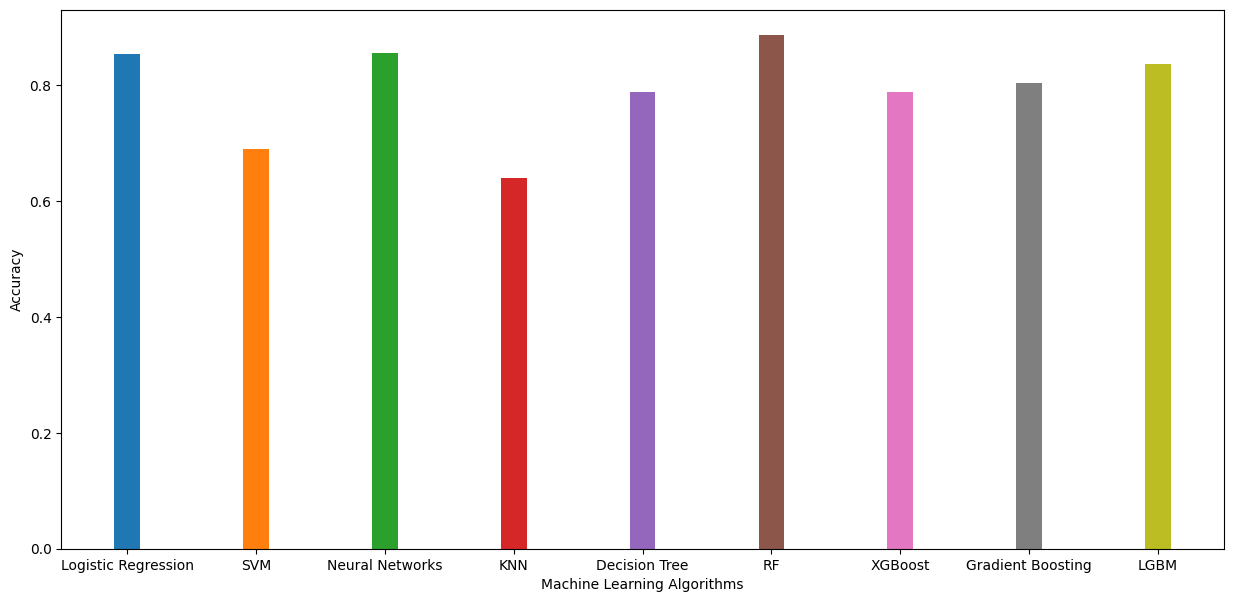

In [41]:
plt.figure(figsize=(15,7))
plt.bar("Logistic Regression", logistic_acc, width=0.2)
plt.bar("SVM", svm_accu, width=0.2)
plt.bar("Neural Networks",accuracy, width=0.2)
plt.bar("KNN",knn_accu,width=0.2)
plt.bar("Decision Tree", tree_accu,width=0.2)
plt.bar("RF", rf_accu,width=0.2)
plt.bar("XGBoost", xg_accu,width=0.2)
plt.bar("Gradient Boosting", gbc_accu,width=0.2)
plt.bar("LGBM",gbm_accu,width=0.2)
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Accuracy')

In [42]:
result= model_svm.predict([[42,1,0,140,226,0,1,178,0,0,2,0,2]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [44]:
if result==[0]:
  print("person not having heart Disease")
else:
  print("person have a heart Disease")

person have a heart Disease


In [45]:

rslt= model_svm.predict([[59,1,0,140,177,0,1,162,1,0,2,1,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [46]:
if rslt==[0]:
  print("person not having heart Disease")
else:
  print("person have a heart Disease")

person have a heart Disease
